In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata = pd.read_csv(mouse_drug_data_to_load)
drugdata = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
CombinedMouseDrugData_df = pd.merge(mousedata, drugdata, how='outer', on='Mouse ID')

# Display the data table for preview
CombinedMouseDrugData_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TumorGroup= CombinedMouseDrugData_df.groupby(['Drug', 'Timepoint'])
TumorMean = TumorGroup['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
TumorVol_df = pd.DataFrame(TumorMean)
TumorVol_df = TumorVol_df.reset_index()
# Preview DataFrame
TumorVol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TumorGroup = CombinedMouseDrugData_df.groupby(['Drug', 'Timepoint'])
Tumorsems = TumorGroup['Tumor Volume (mm3)'].sem()


# Convert to DataFrame
TumorSE_df = pd.DataFrame(Tumorsems)
TumorSE_df = TumorSE_df.reset_index()
# Preview DataFrame

TumorSE_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
ReGroupTumorVol = TumorVol_df.pivot_table(index=['Drug','Timepoint'])
ReGroupTumorVol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:

# Minor Data Munging to Re-Format the Data Frames

FlipTumorVol_df = pd.DataFrame(ReGroupTumorVol).transpose()
#FlipTumorVolGroup = FlipTumorVol_df.groupby('Timepoint')
FlipTumorVol_df = FlipTumorVol_df.stack()

FlipTumorVol_df = FlipTumorVol_df.reset_index()
#FliptumorVol_df = FlipTumorVol_df.set_index(['Drug'])
# Preview that Reformatting worked
FlipTumorVol_df.head()
FinishedTumorVol_df = FlipTumorVol_df.drop('level_0', axis=1, inplace=False)
#FinishedTumorVol_df = FlipTumorVol_df.drop('Drug', axis=1, inplace=False)
#FinishedTumorVol_df = FinishedTumorVol_df.set_index('Timepoint')
FinishedTumorVol_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


Text(0.5,1,'Tumor Respone to Treatment')

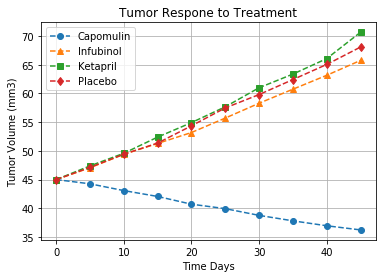

In [6]:
# Generate the Plot (with Error Bars
plt.errorbar(FinishedTumorVol_df["Timepoint"], FinishedTumorVol_df["Capomulin"], fmt='o', linestyle='dashed')
plt.errorbar(FinishedTumorVol_df["Timepoint"], FinishedTumorVol_df["Infubinol"], fmt='^', linestyle='dashed')
plt.errorbar(FinishedTumorVol_df["Timepoint"], FinishedTumorVol_df["Ketapril"], fmt='s', linestyle='dashed')
plt.errorbar(FinishedTumorVol_df["Timepoint"], FinishedTumorVol_df["Placebo"], fmt='d', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('Time Days')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Respone to Treatment")


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MetastaticsitesGroup= CombinedMouseDrugData_df.groupby(['Drug', 'Timepoint'])
MetastaticsitesMean = MetastaticsitesGroup['Metastatic Sites'].mean()

# Convert to DataFrame
MS_df = pd.DataFrame(MetastaticsitesMean)
# Preview DataFrame
MS_df


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetastaticsitesGroupSEM= CombinedMouseDrugData_df.groupby(['Drug', 'Timepoint'])
MetaGroupSem = MetastaticsitesGroupSEM['Metastatic Sites'].sem()
# Convert to DataFrame
MSsem_df = pd.DataFrame(MetaGroupSem)
# Preview DataFrame
MSsem_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [10]:
# Minor Data Munging to Re-Format the Data Frames           ####Tryin Pivot but can seperate the Drug and Timepoint
MS_df = MS_df.reset_index()
MS_df = MS_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
MSsem_df = MSsem_df.reset_index()
MSsem_df = MSsem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

#MSsem_df = MSsem_df.drop('drug', axis=1, inplace=False)
MS_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(MS_df["Drug"], MS_df["Capomulin"],fmt='o', linestyle='dashed')  # yerr=MSsem['Metastatic Sites]
# Save the Figure

# Show the Figure
plt.show

KeyError: 'Drug'

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()